# Capítulo 8. Introducción al Procesamiento del lenguaje natural

In [2]:
!pip install nltk

In [1]:
import nltk
from nltk.tokenize import word_tokenize

## Tokenizar

In [3]:
nltk.download('punkt')
texto = "¡Hola! Este es un ejemplo con la librería NLTK"

tokens = word_tokenize(texto, language='spanish')
print(tokens)

[nltk_data] Downloading package punkt to C:\Users\Carlos
[nltk_data]     Pineda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['¡Hola', '!', 'Este', 'es', 'un', 'ejemplo', 'con', 'la', 'librería', 'NLTK']


In [13]:
from nltk.tokenize import sent_tokenize

texto = "Hola, bienvenido a la PLN. Este es un capítulo introductorio usando NLTK"
oraciones = sent_tokenize(texto)
print("Oraciones:", oraciones)

Oraciones: ['Hola, bienvenido a la PLN.', 'Este es un capítulo introductorio usando NLTK']


In [19]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize("I'm learning NLP. It's fun!")

['I', "'m", 'learning', 'NLP.', 'It', "'s", 'fun', '!']

In [22]:
from nltk.tokenize import RegexpTokenizer
frase = "En la tienda un computador cuesta entre $2.000.000 y $10.000.000."
tokenizador = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
tokenizador.tokenize(frase)

['En',
 'la',
 'tienda',
 'un',
 'computador',
 'cuesta',
 'entre',
 '$2.000.000',
 'y',
 '$10.000.000.']

In [23]:
from nltk.tokenize import TweetTokenizer
mensaje = "@cmpineda Voy a comprar el libro de ML!!! :-D #python #programación"
tokenizador = TweetTokenizer()
tokenizador.tokenize(mensaje)

['@cmpineda',
 'Voy',
 'a',
 'comprar',
 'el',
 'libro',
 'de',
 'ML',
 '!',
 '!',
 '!',
 ':-D',
 '#python',
 '#programación']

## Conversión a minúsculas

In [36]:
tokens = [palabra.lower() for palabra in tokens]
tokens

['¡hola', '!', 'este', 'es', 'un', 'ejemplo', 'con', 'la', 'librería', 'nltk']

In [37]:
texto = "Este libro trata sobre los fundamentos de la Inteligencia Artificial"
cadena_convertida = texto.lower()
cadena_convertida

'este libro trata sobre los fundamentos de la inteligencia artificial'

In [38]:
type(texto)

str

## Las palabras vacías

In [74]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Carlos
[nltk_data]     Pineda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
palabras_vacias = stopwords.words('spanish')
print("Total de palabras vacías del español: ", len(palabras_vacias))
palabras_vacias[:5]

Total de palabras vacías del español:  313


['de', 'la', 'que', 'el', 'en']

In [76]:
palabras = ["Esto", 'es', 'una', 'prueba','de', 'uso','de','palabras','vacías']
palabras_relevantes = [p for p in palabras if p not in palabras_vacias]
palabras_relevantes

['Esto', 'prueba', 'uso', 'palabras', 'vacías']

## Stemming

In [87]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('running'))
print(stemmer.stem("jumps"))
print(stemmer.stem("studies"))

run
jump
studi


In [89]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("spanish")
print(stemmer.stem("corriendo"))  
print(stemmer.stem("amigos"))     
print(stemmer.stem("rápido"))     

corr
amig
rap


In [ ]:
# Algoritmo de Lancaster
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
stemmer.stem('cooking')

'cook'

## Lematización

In [103]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lematizador = WordNetLemmatizer()
print(lematizador.lemmatize('cookbooks'))
print(lematizador.lemmatize("running", pos="v"))  # 'run'
print(lematizador.lemmatize("flies", pos="n"))    # 'fly'
print(lematizador.lemmatize("better", pos="a"))   # 'good'

cookbook
run
fly
good


[nltk_data] Downloading package wordnet to C:\Users\Carlos
[nltk_data]     Pineda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [100]:
lista = ['I','am','learning','machine','learning','algorithms']
nltk.download('averaged_perceptron_tagger')
categorias_gramaticales_frase = nltk.pos_tag(lista)
categorias_gramaticales_frase

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Carlos Pineda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('am', 'VBP'),
 ('learning', 'VBG'),
 ('machine', 'NN'),
 ('learning', 'NN'),
 ('algorithms', 'NN')]

In [104]:
from nltk.corpus import wordnet

def obtener_pos_etiqueta(token):
    etiquetas = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    etiqueta = nltk.pos_tag([token])[0][1][0].upper()
    return etiquetas.get(etiqueta, wordnet.NOUN)

In [106]:
salida = [lematizador.lemmatize(token, obtener_pos_etiqueta(token)) for token in lista]
print(' '.join(salida))

I be learn machine learn algorithm


In [115]:
palabras_pregunta = ['que', 'donde']
palabras_vacias = set(stopwords.words('spanish'))
oracion = "¿que es la IA? ¿donde encuentro el libro de IA?"
for palabra in palabras_pregunta:
    palabras_vacias.remove(palabra)
salida = [token for token in oracion.split() if token not in palabras_vacias]
print(' '.join(salida))

¿que IA? ¿donde encuentro libro IA?


## N-Gramas

In [121]:
from nltk.util import ngrams
s = "El procesamiento del lenguaje natural es muy interesante"
tokens = s.split()
bigramas = list(ngrams(tokens, 2))
print([" ".join(token) for token in bigramas])

['El procesamiento', 'procesamiento del', 'del lenguaje', 'lenguaje natural', 'natural es', 'es muy', 'muy interesante']


In [122]:
trigramas = list(ngrams(tokens, 3))
trigramas

[('El', 'procesamiento', 'del'),
 ('procesamiento', 'del', 'lenguaje'),
 ('del', 'lenguaje', 'natural'),
 ('lenguaje', 'natural', 'es'),
 ('natural', 'es', 'muy'),
 ('es', 'muy', 'interesante')]

## Bolsa de palabras

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

# Corpus de ejemplo
corpus = [
    "PLN es interesante",
    "PLN pertenece a la IA",
    "La IA es apasionante"
]

# Crear el modelo BoW
vectorizador = CountVectorizer()
X = vectorizador.fit_transform(corpus)

# Mostrar resultados
print("Vocabulario:", vectorizador.get_feature_names_out())
print("Matriz BoW:\n", X.toarray())

Vocabulario: ['apasionante' 'es' 'ia' 'interesante' 'la' 'pertenece' 'pln']
Matriz BoW:
 [[0 1 0 1 0 0 1]
 [0 0 1 0 1 1 1]
 [1 1 1 0 1 0 0]]


In [133]:
oracion_nueva = "Me gusta la IA"
nuevo_vector = vectorizador.transform([oracion_nueva])
nuevo_vector.todense()

matrix([[0, 0, 1, 0, 1, 0, 0]], dtype=int64)

## TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Lista de oraciones
corpus = [
    "Estoy aprendiendo NLP",
    "Estoy aprendiendo IA",
    "IA y NLP me gustan"
]

In [146]:
# Crear el vectorizador TF-IDF
vectorizador = TfidfVectorizer()

# Transformar las oraciones al espacio vectorial TF-IDF
X_tfidf = vectorizador.fit_transform(corpus)

In [147]:
# Obtener los términos del vocabulario
vocabulario = vectorizador.get_feature_names_out()

# Convertir la matriz TF-IDF en un DataFrame para mejor visualización
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vocabulario, index=[f"Doc{i+1}" for i in range(len(corpus))])

# Mostrar la tabla TF-IDF
print("Representación TF-IDF:")
print(df_tfidf)

Representación TF-IDF:
      aprendiendo    estoy    gustan        ia        me       nlp
Doc1      0.57735  0.57735  0.000000  0.000000  0.000000  0.577350
Doc2      0.57735  0.57735  0.000000  0.577350  0.000000  0.000000
Doc3      0.00000  0.00000  0.562829  0.428046  0.562829  0.428046


## Similitud de coseno

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [189]:
frases = ["La Inteligencia Artificial es divertida", "La Inteligencia Artificial es apasionante"]

In [190]:
# convertir texto a vectores
def obtener_vectores_tf_idf(corpus):
    vectorizador_tfidf = TfidfVectorizer()
    res_tfidf = vectorizador_tfidf.fit_transform(corpus)
    return res_tfidf

In [191]:
vectores_tfidf = obtener_vectores_tf_idf(frases)

In [192]:
vectores_tfidf.todense()

matrix([[0.        , 0.4090901 , 0.57496187, 0.4090901 , 0.4090901 ,
         0.4090901 ],
        [0.57496187, 0.4090901 , 0.        , 0.4090901 , 0.4090901 ,
         0.4090901 ]])

In [201]:
cosine_similarity(vectores_tfidf[0],vectores_tfidf[1])[0][0]

0.6694188517266485

In [194]:
def similitud_coseno(vector1, vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    return np.dot(vector1, vector2) / (np.sqrt(np.sum(vector1**2)) * np.sqrt(np.sum(vector2**2)))

In [202]:
vector1 = vectores_tfidf[0].toarray().flatten()
vector2 = vectores_tfidf[1].toarray().flatten()
similitud_coseno(vector1,vector2)

0.6694188517266485

## Clasificador de mensaje de grupos de noticias

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
print("Mensaje: ", data.data[27])
categoria = data.target_names[ data.target[27] ]
print("Categoría: " ,categoria)

Mensaje:  From: r4938585@joplin.biosci.arizona.edu (Doug Roberts)
Subject: Re: NL vs. AL?
Organization: University of Arizona, Biotechnology, Tucson
Lines: 2
NNTP-Posting-Host: joplin.biosci.arizona.edu
Keywords: Game length

Doug Roberts - Ken Hill for NL MVP!!
	       Let's go 'Spos

Categoría:  rec.sport.baseball


In [4]:
categorias = ['rec.autos', 'sci.electronics',
              'sci.space', 'comp.graphics']
entrenamiento = fetch_20newsgroups(subset='train', categories=categorias)
prueba = fetch_20newsgroups(subset='test', categories=categorias)

In [5]:
print(entrenamiento.data[5])

From: ab@nova.cc.purdue.edu (Allen B)
Subject: Re: thining algorithm
Organization: Purdue University
Lines: 15

In article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  
(Kevin Shin) writes:
> I am trying obtain program to preprocess handwriting characters.
> Like thining algorithm, graph alogrithm.
> Do anyone know where I can obtain those?

I usually use "Algorithms for graphics and image processing" by
Theodosios Pavlidis, but other people here got them same idea and now
3 of 4 copies in the libraries have been stolen!

Another reference is "Digital Image Processing" by Gonzalez and
Wintz/Wood, which is widely available but a little expensive ($55
here- I just checked today).

ab



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [7]:
modelo = make_pipeline(TfidfVectorizer(), MultinomialNB())
modelo.fit(entrenamiento.data, entrenamiento.target)
predicciones = modelo.predict(prueba.data)

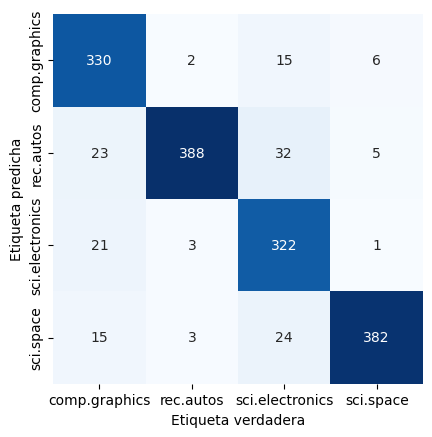

In [9]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
matriz = confusion_matrix(prueba.target, predicciones)
sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
            xticklabels=entrenamiento.target_names, yticklabels=entrenamiento.target_names)
plt.xlabel('Etiqueta verdadera')
plt.ylabel('Etiqueta predicha');
plt.savefig("my_plot.jpg", dpi=300) 

In [11]:
def predecir_categoria(mensaje, train=entrenamiento, model=modelo):
    pred = modelo.predict([mensaje])
    return entrenamiento.target_names[pred[0]]

In [12]:
print(predecir_categoria('The ship landed on the moon'))
print(predecir_categoria('Increase screen resolution'))
print(predecir_categoria('drive the car on the avenue'))

sci.space
comp.graphics
rec.autos


## Clasificador de noticias falsas

In [497]:
df = pd.read_csv("../datasets/news.csv")
df.head(3)

,News,Fake
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True


In [498]:
df.Fake.value_counts()

Fake
True     5752
False    4488
Name: count, dtype: int64

In [499]:
d = {False:0, True:1}
df['Fake'] = df['Fake'].map(d)

In [500]:
import re
import unicodedata
import nltk

nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

def limpiar(text):
    # Convertir a minúsculas
    text = text.lower()      
    
    # Eliminar URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remover caracteres que no sean letras o dígitos
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # Eliminar espacios extra
    text = re.sub(r'\s+', ' ', text).strip()
    
    # (Opcional) Eliminar stopwords
    stops = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stops)    
    return text

In [501]:
df["noticia_limpia"] = df['News'].apply(limpiar)

In [521]:
df.sample(5)

,News,Fake,noticia_limpia
6250,Make no mistake -- Sherrod Brown is one of the...,0,make mistake sherrod brown one main c politici...
6463,The 2011 Legislature did not cut Texas public ...,0,legislature cut texas public school funding
2293,Says the Obama administration plans to reduce ...,0,says obama administration plans reduce number ...
4719,Greg Abbott defended more than $5 billion in p...,1,greg abbott defended billion public school fun...
7174,The $290 million structural surplus in the 201...,0,million structural surplus wisconsin budget re...


In [503]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [504]:
X_train, X_test, y_train, y_test = train_test_split(df["noticia_limpia"], 
                                                    df["Fake"], 
                                                    test_size=0.3, 
                                                    random_state=42)

In [522]:
tfidf = TfidfVectorizer(max_features=500)
X_train_transformada = tfidf.fit_transform(X_train)
X_test_transformada = tfidf.transform(X_test)

In [523]:
df_tfidf = pd.DataFrame(X_train_transformada.todense())
df_tfidf.columns = tfidf.vocabulary_
#df_tfidf.sample(5)

In [524]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_transformada.toarray(), y_train)

LogisticRegression()

In [532]:
exactitud = clf.score(X_test_transformada.toarray(), y_test)
print('El modelo tiene una exactitud de: {:.0%}'.format(exactitud))

El modelo tiene una exactitud de: 61%


In [529]:
def predecir(noticia):
    cadena_transformada = tfidf.transform(noticia)
    p=clf.predict(cadena_transformada.toarray())    
    if p[0]==1:
         print("Noticia Falsa")
    else: 
         print("Noticia Real")

In [530]:
predecir(['Trump proposes to increase taxes and tariffs'])

Noticia Falsa


In [538]:
predecir(['The Brasil national team has been world football champion.'])

Noticia Real


In [537]:
#exportar los modelos
import pickle

with open("tfidf.pkl", "wb") as tfidf_arch:
    pickle.dump(tfidf, tfidf_arch)

with open("reg_log.pkl", "wb") as modelo_arch:
    pickle.dump(clf, modelo_arch)
#print("modelos exportados correctamente")

In [19]:
from PIL import Image
# Convertir a escala de grises
img = Image.open("plot.jpeg").convert('L')
img.save('plot_grayscale.jpg', dpi=(300,300))

## ChatBot de respuestas a preguntas

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
import nltk

In [2]:
columnas = ['Mensaje','Tipo de Mensaje','Respuesta']
df = pd.read_excel("../datasets/preguntas_respuestas.xlsx", names=columnas)
df.sample(5)

,Mensaje,Tipo de Mensaje,Respuesta
97,Necesito una carta de recomendación para práct...,Solicitud,Revisa las opciones disponibles en el reglamen...
89,No recibí respuesta a mi solicitud de homologa...,Reclamo,Estamos verificando los plazos para corregir e...
6,El proceso de inscripción de materias es muy l...,Queja,"Lamentamos los inconvenientes, trabajaremos pa..."
81,¿Qué documentos debo presentar para solicitar ...,Pregunta,Habla directamente con el profesor para coordi...
95,El profesor no asiste regularmente a las clases.,Queja,Te invitamos a registrar esta incidencia en el...


In [3]:
df.shape

(100, 3)

In [4]:
df1 = pd.read_table("../datasets/saludos.txt", delimiter=';;', names=columnas)
df1

C:\Users\Carlos Pineda\AppData\Local\Temp\ipykernel_8028\357394144.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_table("../datasets/saludos.txt", delimiter=';;', names=columnas)


,Mensaje,Tipo de Mensaje,Respuesta
0,Hola como estás?,Saludo,"Muy bien gracias, en que puedo ayudarte?"
1,Hasta luego,Despedida,Vuelve pronto.
2,Chao,Despedida,Hasta pronto.
3,Bye,Despedida,Bye
4,Fin,Despedida,"Chao, vuelve pronto."
5,Hola,Saludo,"Hola, en que puedo ayudarte hoy?"
6,"Buenos días, como estás? un saludo cordial",Saludo,"Hola, estoy muy bien gracias y tu? Puedo ayud..."


In [5]:
df2 = pd.concat([df, df1], axis=0)
df2.shape

(107, 3)

In [6]:
# mapear variable Tipo Mensaje
df2['Tipo de Mensaje'].unique()

array(['Solicitud', 'Pregunta', 'Queja', 'Reclamo', 'Saludo', 'Despedida'],
      dtype=object)

In [7]:
d = {'Solicitud':0, 'Pregunta':1, 'Queja':2, 'Reclamo':3, 'Saludo':4, 'Despedida':5}
df2['etiqueta'] = df2['Tipo de Mensaje'].map(d)

In [8]:
df2.sample(5)

,Mensaje,Tipo de Mensaje,Respuesta,etiqueta
59,¿Cuáles son los requisitos para matricularme e...,Pregunta,Debes acercarte a la oficina de registro acadé...,1
77,Los horarios de clase no son compatibles con l...,Queja,Te invitamos a registrar esta incidencia en el...,2
9,Necesito una carta de recomendación para práct...,Solicitud,Revisa las opciones disponibles en el reglamen...,0
47,¿Cuáles son los requisitos para matricularme e...,Pregunta,Habla directamente con el profesor para coordi...,1
52,Solicito información sobre las opciones de tra...,Solicitud,Puedes realizar tu solicitud formal a través d...,0


In [9]:
df2.etiqueta.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [10]:
# preparación del texto (cambiar caracteres especiales por espacion en blanco y convertir a minusculas)
def limpiar(mensaje):
    mensaje = re.sub(r'([^\s\w]|_)',' ', str(mensaje))
    mensaje = mensaje.lower()
    return mensaje        

In [11]:
df2['Mensaje_limpio'] = df2['Mensaje'].apply(limpiar)
df2[['Mensaje_limpio', 'Mensaje']].head(5)

,Mensaje_limpio,Mensaje
0,solicito información sobre las opciones de tra...,Solicito información sobre las opciones de tra...
1,cuáles son los requisitos para matricularme e...,¿Cuáles son los requisitos para matricularme e...
2,el proceso de inscripción de materias es muy l...,El proceso de inscripción de materias es muy l...
3,cuáles son los requisitos para matricularme e...,¿Cuáles son los requisitos para matricularme e...
4,hay problemas con la plataforma virtual no pu...,"Hay problemas con la plataforma virtual, no pu..."


In [14]:
tfidf = TfidfVectorizer(max_features=500)
X_transformado = tfidf.fit_transform(df2['Mensaje_limpio'])

In [15]:
df_tfidf = pd.DataFrame(X_transformado.todense())
df_tfidf.columns = tfidf.vocabulary_
df2.to_pickle('dataframe.pkl')
df_tfidf

,solicito,información,sobre,las,opciones,de,trabajo,grado,cuáles,son,...,hasta,luego,chao,bye,fin,buenos,días,un,saludo,cordial
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.281205,0.0,0.00000,0.0,0.0,0.413485,0.000000,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.32984,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.32984,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,0.343081,0.0,0.0,0.0,0.0,0.343081,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.343081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000
103,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000
104,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000
105,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [16]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(df_tfidf, df2['etiqueta'])

GaussianNB()

In [18]:
cadena_prueba = ["Hola, buenos días"]
cadena_transformada = tfidf.transform(cadena_prueba)
cadena_transformada

<1x119 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [19]:
prediccion = nb.predict(cadena_transformada.toarray())
print("La predicción es:", prediccion[0])

La predicción es: 4


C:\Users\Carlos Pineda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

respuestas = df2["Respuesta"].tolist()
sim_cos = cosine_similarity(cadena_transformada, X_transformado)[0]
angulo = np.rad2deg(np.arccos(max(sim_cos)))

if angulo > 60 : # similitud menor
    print("Lo siento, no entendí la pregunta")
else: # similitud mayor
    print(respuestas[np.argmax(sim_cos)])

Hola, en que puedo ayudarte hoy?


In [626]:
# exportar modelos
import pickle

with open("tfidf_chat.pkl", "wb") as tfidf_arch:
    pickle.dump(tfidf, tfidf_arch)

with open("cls_chat.pkl", "wb") as modelo_arch:
    pickle.dump(nb, modelo_arch)
    